## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.

As a data analyst, our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data
country = pd.read_csv('Country-data.csv')

### 2. Inspecting data

In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 3. EDA

`exports`, `health` and `imports` are in percentage terms of gdpp

In [5]:
# converting them to absolute numbers
features = ['exports', 'health', 'imports']

for var in features:
    country[var] = (country[var] / 100 ) * country['gdpp']

In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### 3.1 Univariate Analysis

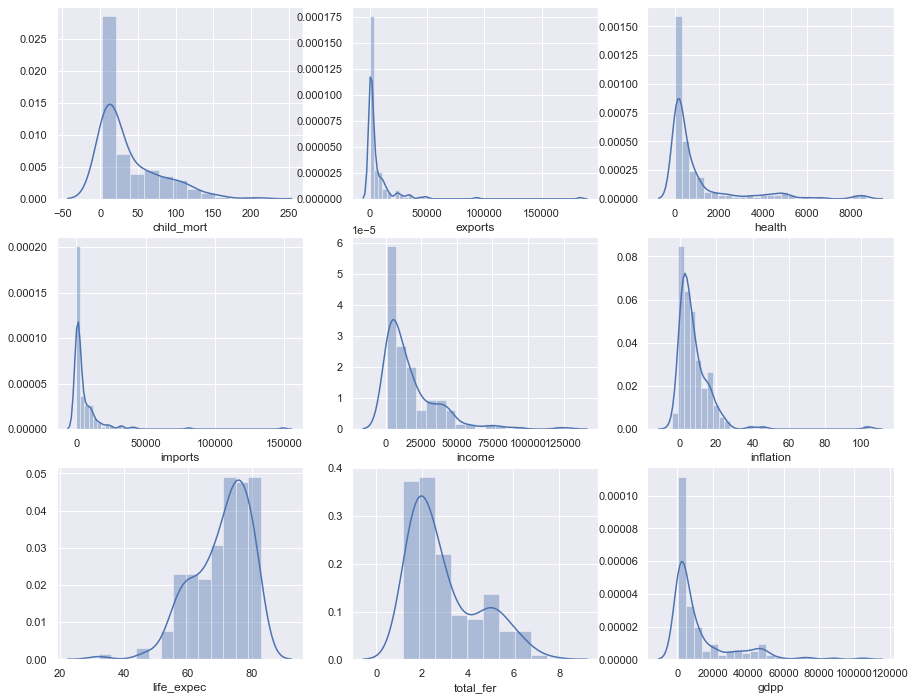

In [7]:
# distribution plot of variables
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
cols = country.columns[1:]
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])


- Almost all variables have skewed distribution
- Variables acting as indicators for countries condition are gdpp, health, income and child mortality

#### 3.2 Bivariate Analysis

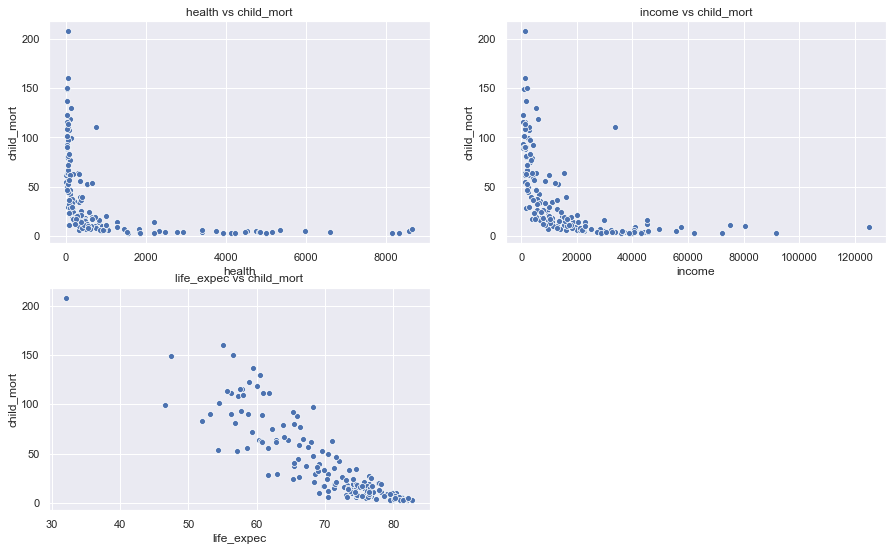

In [8]:
# Plotting health, income and life_expec against child_mortality

features = ['health','income','life_expec']

plt.figure(figsize=(15,9))
for i in enumerate(features):
    plt.subplot(2,2,i[0] +1)
    sns.scatterplot(x =i[1], y='child_mort', data=country )
    plt.title(i[1] + ' vs child_mort')

plt.show()

- health and income graph with child_mort are almost same. They may be coorealetd to each other.This can be verified using  .corr() function.
- life_expec graph is justified as it is more for countries with less child_mort values

##### For the purpose of cluster profiling, we will be using variables `gdpp`, `income` and `child_mort` 

#### 3.3 Outlier Detection

In [9]:
country.describe(percentiles=[.01,.05,.25,.75,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


Checking outliers of variables uing boxplot

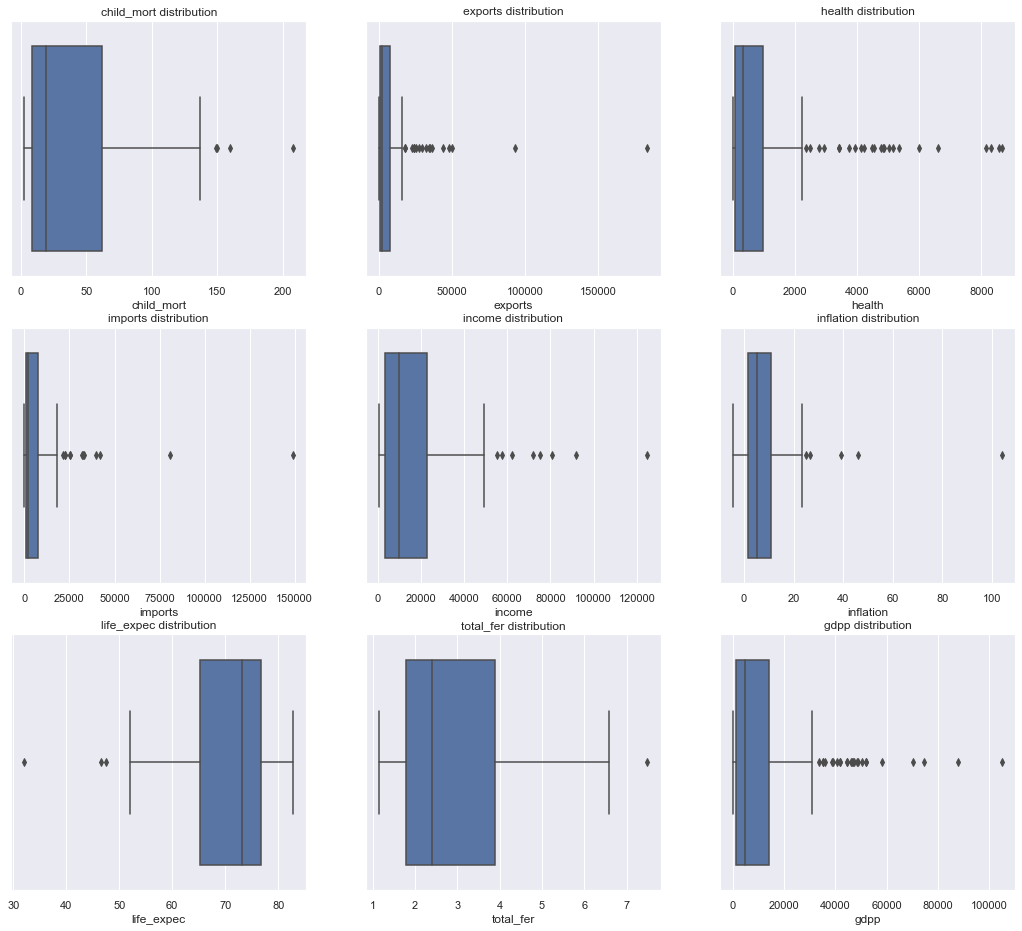

In [10]:
plt.figure(figsize=(18,16))
cols = country.columns[1:]
for i in enumerate(cols):
    plt.subplot(3,3,i[0] +1)
    sns.boxplot(country[i[1]])
    plt.title(i[1] + ' distribution')

High values for `exports`, `health`, `imports`, `income`, `total_fer`, `gdpp` variables shows the better conditions for country. Since, we are more interested in countries with bad conditions. We can cap the outliers for these variables

In [11]:
# capping upper tail of below variables
upper_cap = ['exports', 'health', 'imports', 'income','total_fer', 'gdpp']

for i in upper_cap:
    q4 = country[i].quantile(0.90)
    country[i][country[i]>= q4] = q4

# capping lower tail of child_mort
lower_cap = ['child_mort']

for i in upper_cap:
    q1 = country[i].quantile(0.05)
    country[i][country[i]<= q1] = q1

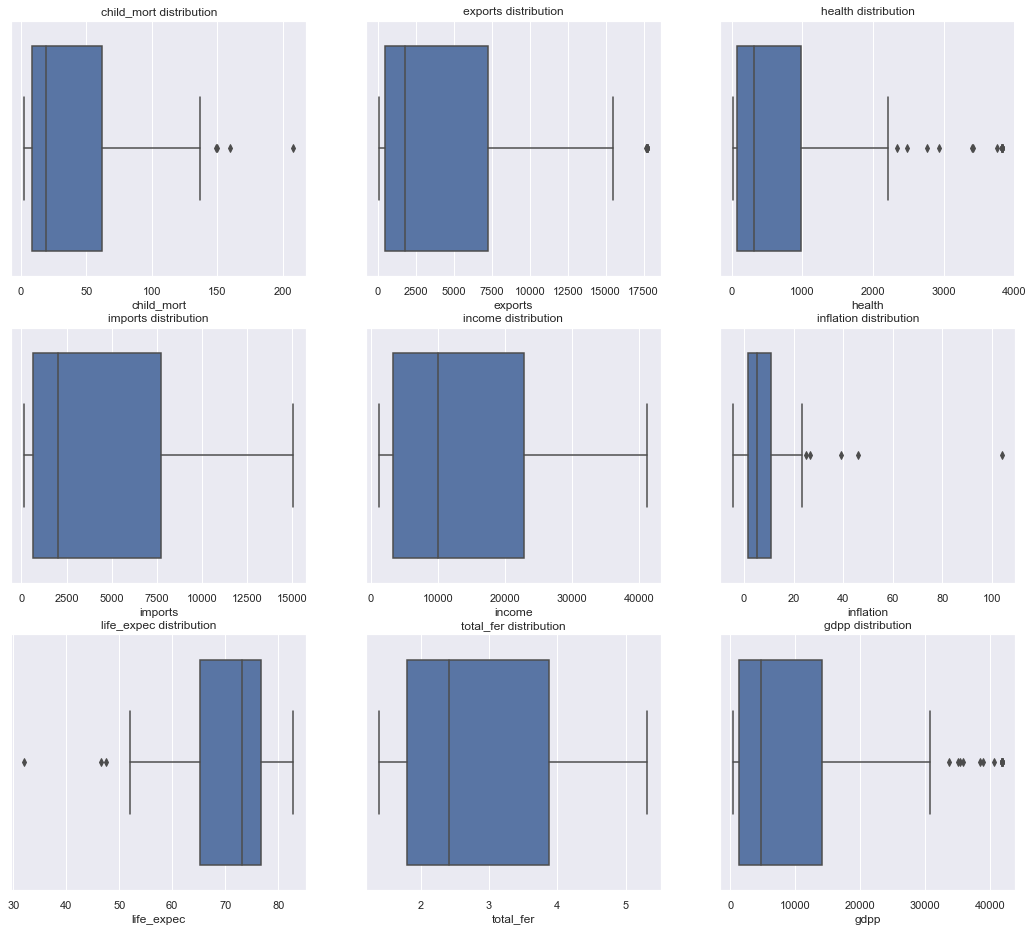

In [12]:
# boxplots after removing outliers

plt.figure(figsize=(18,16))
cols = country.columns[1:]
for i in enumerate(cols):
    plt.subplot(3,3,i[0] +1)
    sns.boxplot(country[i[1]])
    plt.title(i[1] + ' distribution')


#### 3.4 Clustering Tendency

In [13]:
# Implementing Hopkins to check the clustering tendency of the data

# Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
#hopkins(country.drop('country', axis = 1))

In [15]:
# Taking average of hopkins scoreS taken for 10 times
hopkins_avg = []

[hopkins_avg.append(hopkins(country.drop('country', axis = 1))) for i in range(10)]
    
np.mean(hopkins_avg)

0.8895995031462544

- Value above `.8` of hopkins score shows good clustering tendency

#### 3.5 Scaling Variables

In [16]:
# Scaling the variables
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [17]:
country_scaled = scalar.fit_transform(country.ix[:,1:])
country_scaled = pd.DataFrame(country_scaled, columns =country.columns[1:])

In [18]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.795082,-0.677363,-0.842335,-0.996860,0.157336,-1.619092,1.798291,-0.787387
1,-0.538949,-0.611982,-0.490744,-0.494515,-0.388042,-0.312347,0.647866,-0.908056,-0.531808
2,-0.272833,-0.515308,-0.558390,-0.611952,-0.170712,0.789274,0.670423,0.005852,-0.505072
3,2.007808,-0.432416,-0.628897,-0.589170,-0.682938,1.387054,-1.179234,1.798291,-0.572273
4,-0.695634,0.138626,-0.104449,0.544892,0.282975,-0.601749,0.704258,-0.554285,0.054211


### 4. Modelling

#### 4.1 KMeans Modelling

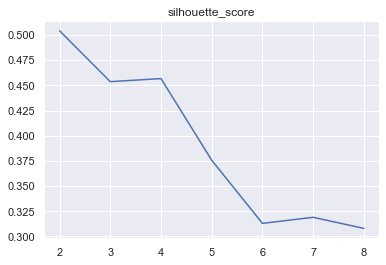

In [19]:
# Running KMeans clustering for clusters #s: 2 - 9
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,9):
    kmeans = KMeans(n_clusters = k, max_iter=50).fit(country_scaled)
    ss.append([k,silhouette_score(country_scaled, kmeans.labels_) ])
    
temp = pd.DataFrame(ss)

plt.plot(temp[0], temp[1])
plt.title('silhouette_score')
plt.show()

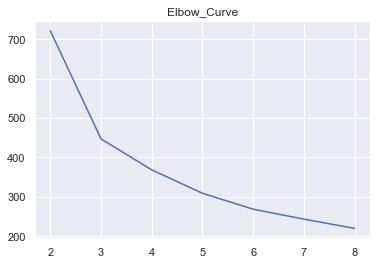

In [20]:
# Finding optimum cluster number using elbow curve(ssd)
ssd = []
for k in range(2,9):
    kmean = KMeans(n_clusters=k).fit(country_scaled)
    ssd.append([k,kmean.inertia_ ])

temp = pd.DataFrame(ssd)

plt.plot(temp[0], temp[1])
plt.title('Elbow_Curve')
plt.show()

- From Sillhouette Score, `3` and `4` both are optimum cluster number
- From Elbow curve,`3` is the optimum cluster number
##### We can choose 3 as the cluster number

In [21]:
# Adding a column label in dataframe country
kmean = KMeans(n_clusters= 3, random_state = 100).fit(country_scaled)
country['label'] = kmean.labels_

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610,9.44,56.2,5.322,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.10,76.5,2.890,4460.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,5.322,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.44,76.8,2.130,12200.0,2


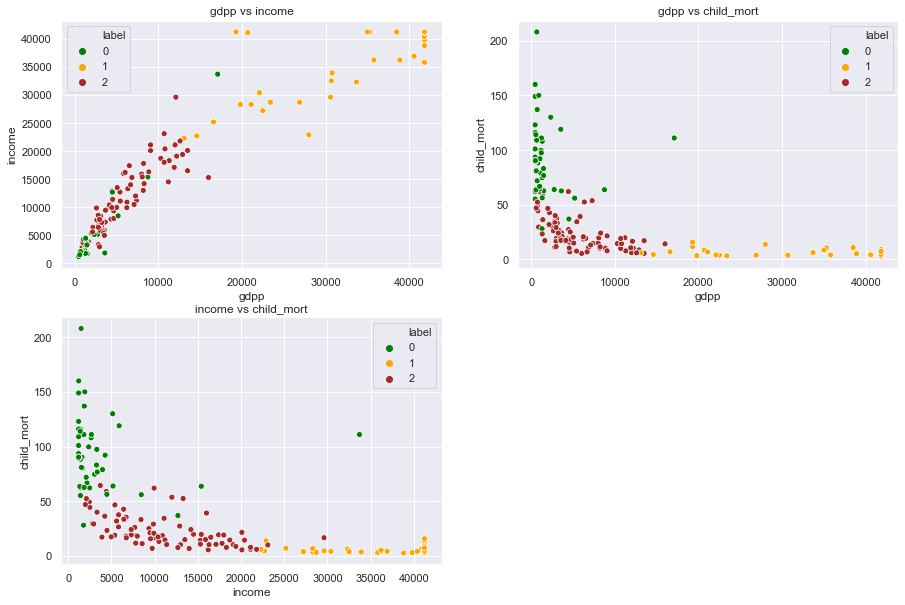

In [22]:
# Plotting scatterplot using clustering profile columns provided

features = ['gdpp', 'income', 'child_mort']
from itertools import combinations

plt.figure(figsize=(15,10))

for var_list in enumerate(combinations(features,2)):
    plt.subplot(2,2,var_list[0]+1)   
    plt.title(var_list[1][0] + ' vs ' + var_list[1][1])
    sns.scatterplot(x=var_list[1][0], y=var_list[1][1], data = country, hue='label', palette=['green','orange','brown'] )


All 3 clusters are clearly identificable in above plots

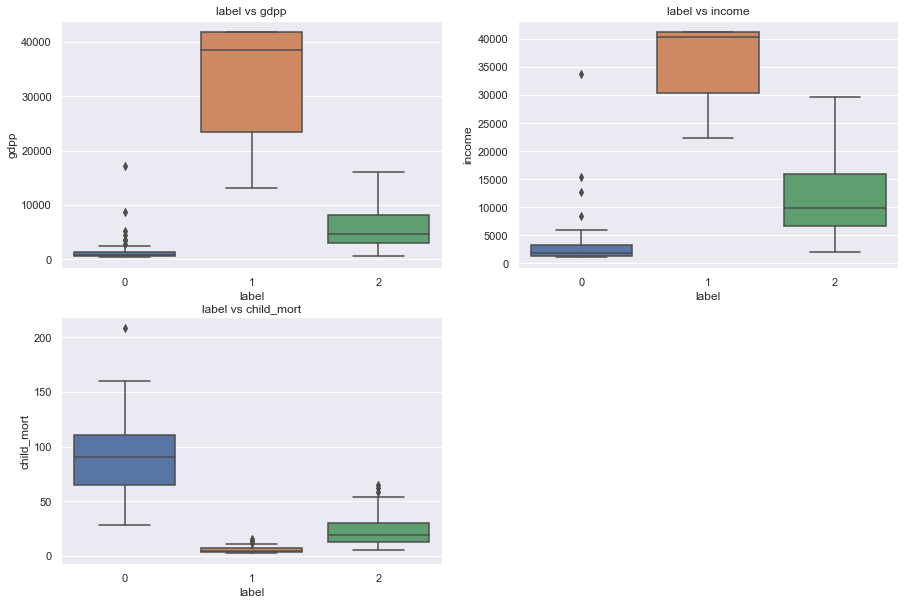

In [23]:
# Plotting scatterplot using boxplot for clustering profile columns selected

features = ['gdpp', 'income', 'child_mort']
plt.figure(figsize=(15,10))

for var_list in enumerate(features):
    plt.subplot(2,2,var_list[0]+1)   
    plt.title( 'label vs ' + var_list[1])
    sns.boxplot(x='label', y=var_list[1], data=country,  )


#### 4.2 Hirerchical Clustering

In [24]:
# Importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [25]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610,9.44,56.2,5.322,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.10,76.5,2.890,4460.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,5.322,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.44,76.8,2.130,12200.0,2


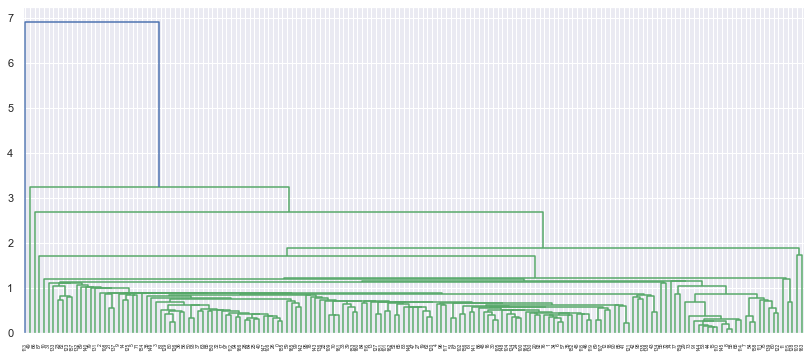

In [26]:
# single linkage
country_link = linkage(country_scaled, method='single',)
plt.figure(figsize=(14,6))
dendrogram(country_link)
plt.show()

- We can see that hirerchical clustering with single linkage have all datapoints in a single cluster.

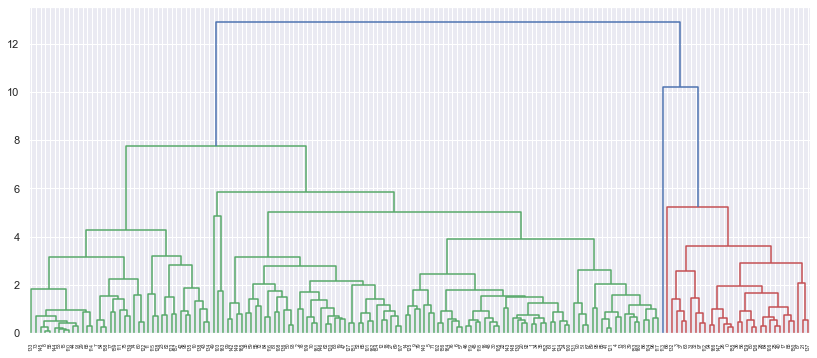

In [27]:
# complete linkage
country_link = linkage(country_scaled, method='complete')
plt.figure(figsize=(14,6))
dendrogram(country_link)
plt.show()

- We can see that hirerchical clustering with complete linkage have 3 clusters with maximum of the datapoints assigned to a single cluster.
- one of the cluster is having a single datapoint

In [28]:
# 3 clusters
cluster_id = cut_tree(country_link, n_clusters=3).reshape(-1, )
cluster_id

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [29]:
# assign cluster labels 
country['hierarchy_label'] = cluster_id
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,hierarchy_label
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610,9.44,56.2,5.322,553.0,0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.49,76.3,1.650,4090.0,2,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.10,76.5,2.890,4460.0,2,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,5.322,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.44,76.8,2.130,12200.0,2,1


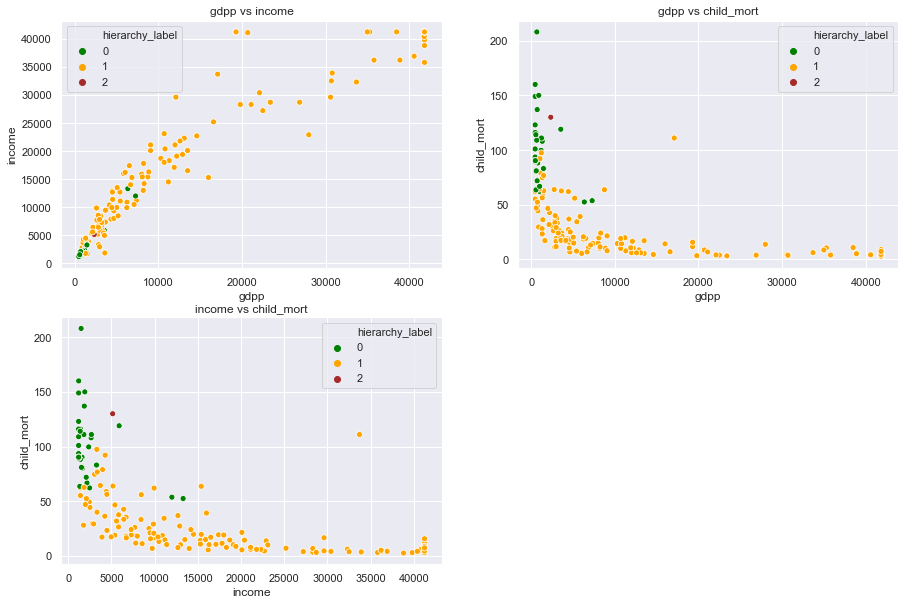

In [30]:
# Plotting scatterplot using clustering profile columns provided
features = ['gdpp', 'income', 'child_mort']
from itertools import combinations

plt.figure(figsize=(15,10))

for var_list in enumerate(combinations(features,2)):
    plt.subplot(2,2,var_list[0]+1)   
    plt.title(var_list[1][0] + ' vs ' + var_list[1][1])
    sns.scatterplot(x=var_list[1][0], y=var_list[1][1], data = country, hue='hierarchy_label', palette=['green','orange','brown'] )


- countries with high child_mort and low income are clustered with Cluster_id as `0`

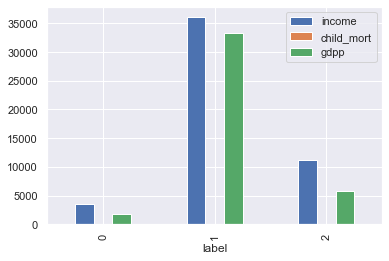

In [31]:
# Clustering profile
# groupby on Kmeeans label
country[['income','child_mort','gdpp','label']].groupby('label').mean().plot(kind='bar')
plt.show()

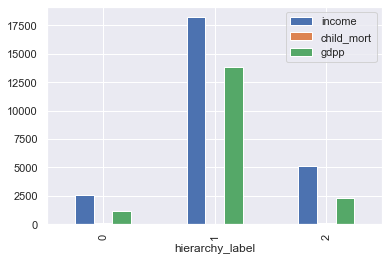

In [32]:
# groupby on Hierarchical label
country[['income','child_mort','gdpp','hierarchy_label']].groupby('hierarchy_label').mean().plot(kind='bar')
plt.show()


##### We can select the top 5 countries with highest child_mort and lowest income & gdpp from cluster 0 for our selection
`or`
##### Do manual selection of countries with income and gdpp in lowest 10 %ile and child_mort in highest 90 %ile


In [33]:
# top 5 countries with highest child_mort and lowest income & gdpp from cluster 0
country_top10 = country[country['hierarchy_label'] ==0].sort_values(by=['child_mort','gdpp','income'],ascending=[False, True, True]).head(10)
country_top10.reset_index(drop=True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,hierarchy_label
0,Haiti,208.0,101.2860,45.74420,428.314,1500,5.45,32.1,3.330,662.0,0,0
1,Sierra Leone,160.0,70.4688,52.26900,169.281,1220,17.20,55.0,5.200,465.9,0,0
2,Chad,150.0,330.0960,40.63410,390.195,1930,6.39,56.5,5.322,897.0,0,0
3,Central African Republic,149.0,70.4688,26.71592,169.281,1213,2.01,47.5,5.210,465.9,0,0
4,Mali,137.0,161.4240,35.25840,248.508,1870,4.37,59.5,5.322,708.0,0,0


In [34]:
#manual selection of countries with income and gdpp in lowest 10 percentile and child_mort in highest 90 percentile

In [35]:
country[['child_mort','income','gdpp']].describe(percentiles=[.01,.05,.25,.75,.95,.99])

,child_mort,income,gdpp
count,167.000000,167.000000,167.000000
mean,38.270060,15232.916168,11449.767066
std,40.328931,13706.928241,13880.772102
min,2.600000,1213.000000,465.900000
1%,2.800000,1213.000000,465.900000
5%,3.460000,1215.100000,470.730000
25%,8.250000,3355.000000,1330.000000
50%,19.300000,9960.000000,4660.000000
75%,62.100000,22800.000000,14050.000000
95%,116.000000,41220.000000,41840.000000


In [36]:
# Considering countries having child_mort in top >= .9 percentile and gdpp and income <= .1 percentile
high_mort = country['child_mort'].quantile(.9)
low_gdpp = country['gdpp'].quantile(.1)
low_income = country['income'].quantile(.1)

countries_4_aid =country[(country['child_mort'] > high_mort) & (country['gdpp'] < low_gdpp) & (country['income'] < low_income)]

In [37]:
countries_4_aid = countries_4_aid.sort_values(by=['child_mort','gdpp','income'],ascending=[False, True, True]).reset_index(drop=True)
countries_4_aid.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,hierarchy_label
0,Sierra Leone,160.0,70.4688,52.26900,169.281,1220,17.20,55.0,5.200,465.9,0,0
1,Central African Republic,149.0,70.4688,26.71592,169.281,1213,2.01,47.5,5.210,465.9,0,0
2,Niger,123.0,77.2560,26.71592,170.868,1213,2.55,58.8,5.322,465.9,0,0
3,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213,20.80,57.5,5.322,465.9,0,0
4,Burkina Faso,116.0,110.4000,38.75500,170.200,1430,6.81,57.9,5.322,575.0,0,0


#### I would select the countries selected manualing from cluster 0 with high Child_mort and low income as it doesn't gives the countries with income/gdpp moderately high, selected just because of high child_mort. i.e. chad's gdpp is 897

- `Sierra Leone`, `Central African Republic`, `Niger`, `Congo, Dem. Rep.` and `Burkina Faso` are the countries selected